In [38]:
# !pip install mpl_finance
# !pip install python-binance
# !pip install pydeck
# !pip install streamlit
# !pip install ipywidgets
# !pip install tabulate
# !pip install --upgrade mplfinance
!pip install matplotlib.finance


ERROR: Could not find a version that satisfies the requirement matplotlib.finance (from versions: none)
ERROR: No matching distribution found for matplotlib.finance


In [35]:
from tabulate import tabulate
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_finance import candlestick_ohlc
import random 
from matplotlib.dates import date2num
import datetime
import binance
import matplotlib.dates as mdates


In [64]:
a = pd.read_csv('podarok.csv', delimiter=';', index_col=[0])
pd.DataFrame(a)

,Лена,Чмоня,Коля,Ксения,Валентин,Шмоня мирная,Виктория,Семён,Павел,Арина,...,Витек,Дарья,Шараф,Александр,Светулик,Полина.1,Кристина,Алёна.2,Ренат,Полина.2
Роял,19,19,"11,8",19,"12,6",17,"8,8","14,3","12,6","10,9",...,18,14,20,"14,4","16,2",18,16,20,"14,3","12,8"
Макчикен Премьер,20,"8,5",18,20,18,17,"10,4","14,6","12,6","10,2",...,17,17,18,17,16,"14,3",15,18,"11,2","10,5"
Филе-о-Фиш,2,"1,9","7,2",6,"6,3",9,"8,8","11,9","1,8","5,1",...,12,18,17,"10,8","12,4","8,5",12,16,"6,8","13,5"
Двойной Роял,15,17,"9,8",19,"15,3",17,"14,4","14,6","14,4","11,6",...,14,13,19,"16,2","12,8","15,1",14,20,"15,3","9,4"
Роял де Люкс,14,"13,2","12,8",20,"15,3",19,"13,6","15,3","16,2","12,3",...,15,18,20,18,"14,4","9,3",17,20,"13,6","13,5"


In [90]:
class expert_evaluations():
    '''
    документация
        '''
    def run():
        calculating = int(input('''Введите каким решением хотите воспользоваться:
              1) Математическая обработочка экспертных оценочек
              2) Математическая обработочка ранговых оценочек
                  '''))
        file = input('''Введите название CSV-файла в формате "name.csv", дорогой пользователь:\n\n''')
        e = expert_evaluations(file)

        if calculating == 1:
            e.expert()
        elif calculating == 2:
            e.rank()
        continue_ = input('Хотите ли вы продолжить дорожайший пользователь?\n(Да или нет)\n')
        continue_ = continue_.lower()
        index = continue_.find('да')
        if index != -1:
            expert_evaluations.run()
        
    def __init__(self, data):
        self.df = pd.DataFrame(pd.read_csv(data, delimiter=';', index_col=[0], decimal=','))
        
    def expert(self):
        df = self.df.copy()
        width, length = df.shape[0], df.shape[1]
        square_list = []
        for i, row in df.iterrows():
            square_list.append(row.map(lambda x:x**2))
        square_df = pd.DataFrame(square_list) # датафрейм квадратов

        mean_list = []
        for i, row in df.iterrows():
            mean_list.append(row.mean())
        mean_df = pd.DataFrame(mean_list, index=df.index, columns =['Матожидание']) # столбец матожидания
        print('Математическое ожидание продукта:\n', tabulate(mean_df, headers = 'keys', tablefmt = 'psql'))
        
        variance_list = []
        for i, row in df.iterrows():
            variance_list.append(row.var())
        variance_df = pd.DataFrame(variance_list) # столбец дисперсии "дисп.в"

        sum_squre_list = []
        for i, row in square_df.iterrows():
                sum_squre_list.append(row.mean())
        sum_squre_df = pd.DataFrame(sum_squre_list) # столбец сумм квадратов

        square_sum_list = []
        for i, row in df.iterrows():
                square_sum_list.append((row.sum()/(len(row)))**2)
        square_sum_df = pd.DataFrame(square_sum_list) # столбец сумм квадратов

        square_sum_list = []
        for i, row in df.iterrows():
                square_sum_list.append((row.sum()/(len(row)))**2)
        square_sum_df = pd.DataFrame(square_sum_list) #столбец квадрат суммы

        general_variance_list = []
        for i in range(len(sum_squre_list)):
            general_variance_list.append(sum_squre_list[i]-square_sum_list[i])
        general_variance_df = pd.DataFrame(general_variance_list, index = df.index, columns = ['Дисперсия']) #столбце дисперсий "дисп.г", полученные по формулам
        print('Дисперсия по продукту:\n', tabulate(general_variance_df, headers = 'keys', tablefmt = 'psql'))
        
        standart_deviation_general_list = []
        for i in general_variance_list:
            standart_deviation_general_list.append(i**0.5)
        standart_deviation_general_df = pd.DataFrame(standart_deviation_general_list, index=df.index, columns=['Sigma'])  #столбец стандартного отклонения "x1" 
                                                                            #(от генеральной совокупности найденного по формулам)
        print('Среднеквадратичное отклонение по продукту:\n', tabulate(standart_deviation_general_df, headers = 'keys', tablefmt = 'psql'))

        standart_deviation_sampled_list = []
        for i in variance_list:
            standart_deviation_sampled_list.append(i**0.5)
        standart_deviation_sampled_df = pd.DataFrame(standart_deviation_sampled_list) #столбец стандартного отклонения "x2" 
                                                                            #(от выборки)

        left_margin = [mean_list[i] - (standart_deviation_general_list[i]*2) for i in range(len(mean_list))]
        right_margin = [mean_list[i] + (standart_deviation_general_list[i]*2) for i in range(len(mean_list))]

        confidence_intervals = [left_margin, right_margin]
        confidence_intervals_df = pd.DataFrame(confidence_intervals, index = ['Левый','Правый'], columns=df.index).T #датафрейм из левого и правого доверительного интервала 
                                                                        #от столбца стандартного отклонения "x1"
        print('Доверительные интервалы :\n', tabulate(confidence_intervals_df, headers = 'keys', tablefmt = 'psql'))

        left_margin_x2 = [mean_list[i] - standart_deviation_sampled_list[i] for i in range(len(mean_list))]
        right_margin_x2 = [mean_list[i] + standart_deviation_sampled_list[i] for i in range(len(mean_list))]
        confidence_intervals_x2 = [left_margin_x2, right_margin_x2]
        confidence_intervals_df_x2 = pd.DataFrame(confidence_intervals_x2).T #датафрейм из левого и правого доверительного интервала 
                                                                        #от столбца стандартного отклонения "x2"
        left_mean = [i *0.99 for i in mean_list]
        right_mean = [i *1.01 for i in mean_list]
        diagramm_list = np.array([left_margin, right_margin, left_mean, right_mean]).T.tolist()

        data=[]
        for i in range(len(diagramm_list)):    
            diagramm_data=[i for i in diagramm_list[i]]
            sorted_data=sorted(diagramm_data)
            one=(i,sorted_data[1],sorted_data[3],sorted_data[0],sorted_data[2])
            data.append(one)
        fig,ax=plt.subplots(facecolor="white",figsize=(12,8))
        fig.subplots_adjust(bottom=0)
        ax.xaxis_date()
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
        plt.xticks(rotation=30)
        plt.title('Биржевая диаграмма')
        plt.xlabel('Продукты')
        plt.ylabel('Балл')
        candlestick_ohlc(ax,data,width=0.9,colorup='blue',colordown='blue',alpha=0.6) 
        plt.grid()
        plt.show()

        return()
    def rank(self):
        df = self.df.copy()
        width, length = df.shape[0], df.shape[1]

        mediana_list = []
        for i, row in df.iterrows():
            mediana_list.append(row.median())
        mediana_df = pd.DataFrame(mediana_list, index = df.index, columns=['Медиана']) # столбец медианы
        print('Медиана по продуктам:\n', tabulate(mediana_df, headers = 'keys', tablefmt = 'psql'))

        mean_list = []
        for i, row in df.iterrows():
            mean_list.append(row.mean())
        mean_df = pd.DataFrame(mean_list, index=df.index) # столбец матожидания

        square_list=[]
        for i in range(len(mediana_list)):
            square_list.append(list(df.iloc[i].map(lambda x: (x-mean_list[i])**2)))
        square_df = pd.DataFrame(square_list) # датафрейм из (x - E)^2 

        sum_square_list=[]
        for i in range(length):
            sum_square_list.append(square_df.iloc[:,i].sum()) # сумма квадратов разностей x и матожидания
        

        standart_deviation_list=[]
        for i in range(len(sum_square_list)):
            standart_deviation_list.append(sum_square_list[i]/(len(df.iloc[:,i])-1))
        standart_deviation_df = pd.DataFrame(standart_deviation_list) # список стандартных отклонений

        divide_by_one_list=[]
        for i in standart_deviation_list:
            divide_by_one_list.append(1/i)
        divide_by_one_df = pd.DataFrame(divide_by_one_list) # 1/D в экселе (1 делить на стандартное отклонение)

        sum_divided_std = sum(divide_by_one_list) # сумма разделенных на 1 чисел        
        expert_competence_ratios = [i/sum_divided_std for i in divide_by_one_list] #КОЭФФИЦИЕНТЫ КОМПEТЕНТНОСТИ ЭКСПЕРТОВ

        ratios = ["{:.2%}".format(i) for i in expert_competence_ratios]
        expert_competence_ratios_df = pd.DataFrame(ratios, index= df.columns, columns =['Коэффициенты'])
        print('Коэффициенты компетентности экспертов:\n', tabulate(expert_competence_ratios_df, headers = 'keys', tablefmt = 'psql'))

        df_list=[]
        for i in range(len(expert_competence_ratios)):
            df_list.append(df.iloc[:,i].tolist()) #неважная часть, облистывание главного датасета

        multiply_weighted_average_ranks_list=[]
        for i in range(len(df_list)):
            inner_list=[]
            for e in df_list[i]:
                inner_list.append(expert_competence_ratios[i]*e)
            multiply_weighted_average_ranks_list.append(inner_list)
        multiply_weighted_average_ranks_df = pd.DataFrame(multiply_weighted_average_ranks_list) #произведения коэффициентов на датасет

        weighted_average_ranks = []
        for i in range(width):
            weighted_average_ranks.append(multiply_weighted_average_ranks_df.iloc[:,i].sum())
        weighted_average_ranks_df = pd.DataFrame(weighted_average_ranks, index = df.index, columns=['Ранги'])#средневзвешанные ранги
        print('Cредневзвешенные ранги по продуктам:\n', tabulate(weighted_average_ranks_df, headers = 'keys', tablefmt = 'psql'))

        return('Обработка завершена!') 

Введите каким решением хотите воспользоваться:
              1) Математическая обработочка экспертных оценочек
              2) Математическая обработочка ранговых оценочек
                  1
Введите название CSV-файла в формате "name.csv", дорогой пользователь:

podarok.csv
Математическое ожидание продукта:
 +------------------+---------------+
|                  |   Матожидание |
|------------------+---------------|
| Роял             |        14.466 |
| Макчикен Премьер |        15.076 |
| Филе-о-Фиш       |         9.33  |
| Двойной Роял     |        14.298 |
| Роял де Люкс     |        14.948 |
+------------------+---------------+
Дисперсия по продукту:
 +------------------+-------------+
|                  |   Дисперсия |
|------------------+-------------|
| Роял             |     14.5706 |
| Макчикен Премьер |     11.947  |
| Филе-о-Фиш       |     23.6773 |
| Двойной Роял     |     10.3326 |
| Роял де Люкс     |     11.5705 |
+------------------+-------------+
Среднеквадратичн

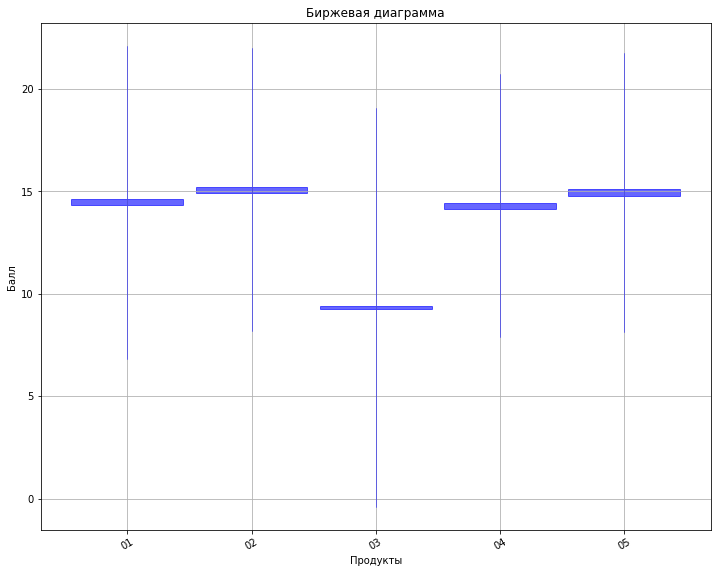

Хотите ли вы продолжить дорожайший пользователь?
(Да или нет)
да
Введите каким решением хотите воспользоваться:
              1) Математическая обработочка экспертных оценочек
              2) Математическая обработочка ранговых оценочек
                  2
Введите название CSV-файла в формате "name.csv", дорогой пользователь:

podarok.csv
Медиана по продуктам:
 +------------------+-----------+
|                  |   Медиана |
|------------------+-----------|
| Роял             |     14.35 |
| Макчикен Премьер |     15    |
| Филе-о-Фиш       |      8.9  |
| Двойной Роял     |     14.4  |
| Роял де Люкс     |     15    |
+------------------+-----------+
Коэффициенты компетентности экспертов:
 +--------------+----------------+
|              | Коэффициенты   |
|--------------+----------------|
| Лена         | 0.73%          |
| Чмоня        | 0.57%          |
| Коля         | 1.63%          |
| Ксения       | 0.71%          |
| Валентин     | 3.28%          |
| Шмоня мирная | 2.16%    

In [93]:
expert_evaluations.run() #ДЛЯ РАБОТЫ ЗАПУСТИТЬ ЭТУ ЧАСТЬ КОДА